In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Depression Student Dataset.csv')
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


In [ ]:
df.Gender.value_counts()

,count
Gender,
Male,267
Female,235


In [ ]:
df.Age.value_counts()

,count
Age,
28,39
20,37
24,37
33,36
29,36
34,32
25,29
21,29
30,28


In [ ]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Moderate,172
Unhealthy,169
Healthy,161


In [ ]:
df['Sleep Duration'].value_counts()

,count
Sleep Duration,
7-8 hours,128
More than 8 hours,128
5-6 hours,123
Less than 5 hours,123


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
X[:,0] = le.fit_transform(X[:,0])
X[:,2] = le.fit_transform(X[:,2])
X[:,4] = le.fit_transform(X[:,4])
X[:,5] = le.fit_transform(X[:,5])
X[:,6] = le.fit_transform(X[:,6])
X[:,9] = le.fit_transform(X[:,9])

In [ ]:
y=le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

'from sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nX_train=sc.fit_transform(X_train)\nX_test=sc.transform(X_test)'

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
ypredi=lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,ypredi)

0.9405940594059405

In [ ]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=lr,X=X_train,y=y_train,cv=10)

In [ ]:
acc.mean()
acc.std()

0.027613335220052906

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
ypred2=dt.predict(X_test)
accuracy_score(y_test,ypred2)

0.8316831683168316

In [ ]:
acc1=cross_val_score(estimator=dt,X=X_train,y=y_train,cv=10)
acc1.mean()

0.8278658536585365

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=7)
rf.fit(X_train,y_train)
ypred3=rf.predict(X_test)
accuracy_score(y_test,ypred3)

0.8514851485148515

In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel='poly')
sv.fit(X_train,y_train)
ypred4=sv.predict(X_test)
accuracy_score(y_test,ypred4)

0.9108910891089109

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
ypred5=gb.predict(X_test)
accuracy_score(y_test,ypred5)

0.8712871287128713

In [ ]:
# Logistic Regression
cm_lr = confusion_matrix(y_test, ypredi)
print("Confusion Matrix for Logistic Regression:\n", cm_lr)

# Decision Tree
cm_dt = confusion_matrix(y_test, ypred2)
print("\nConfusion Matrix for Decision Tree:\n", cm_dt)

# Random Forest
cm_rf = confusion_matrix(y_test, ypred3)
print("\nConfusion Matrix for Random Forest:\n", cm_rf)

# Support Vector Machine
cm_sv = confusion_matrix(y_test, ypred4)
print("\nConfusion Matrix for Support Vector Machine:\n", cm_sv)

# Gradient Boosting
cm_gb = confusion_matrix(y_test, ypred5)
print("\nConfusion Matrix for Gradient Boosting:\n", cm_gb)

Confusion Matrix for Logistic Regression:
 [[45  4]
 [ 2 50]]

Confusion Matrix for Decision Tree:
 [[41  8]
 [ 9 43]]

Confusion Matrix for Random Forest:
 [[42  7]
 [ 8 44]]

Confusion Matrix for Support Vector Machine:
 [[45  4]
 [ 5 47]]

Confusion Matrix for Gradient Boosting:
 [[42  7]
 [ 6 46]]


In [ ]:
# prompt: train me an ann with tf for this dataset

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset (assuming it's in the same directory or provide the correct path)
df = pd.read_csv('/content/Depression Student Dataset.csv')

# Preprocessing (same as before)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
le = LabelEncoder()
for i in [0, 2, 4, 5, 6, 9]:
    X[:, i] = le.fit_transform(X[:, i])
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define the ANN model
model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=X_train.shape[1])) # Input layer
model.add(Dense(units=8, activation='relu')) # Hidden layer
model.add(Dense(units=1, activation='sigmoid')) # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100) # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions (if needed)
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) # Convert probabilities to class labels

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3060 - loss: 0.7794
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3379 - loss: 0.7491
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3548 - loss: 0.7364 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3766 - loss: 0.7221 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4150 - loss: 0.7072
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4565 - loss: 0.6994
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4986 - loss: 0.6924  
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5023 - loss: 0.6903  
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5691 - loss: 0.6765
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6253 - loss: 0.6684  
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.6572  
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -

In [ ]:
confusion_matrix(y_test, y_pred_classes)

array([[47,  2],
       [ 1, 51]])

In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {accuracy}")


if abs(train_accuracy - accuracy) > 0.1:  # Define a threshold (e.g., 0.1)
    print("WARNING: The model might be overfitting. Training and test accuracy differ significantly.")
else:
    print("The model does not appear to be significantly overfitting.")



Training Accuracy: 0.9975062608718872
Test Accuracy: 0.9702970385551453
The model does not appear to be significantly overfitting.


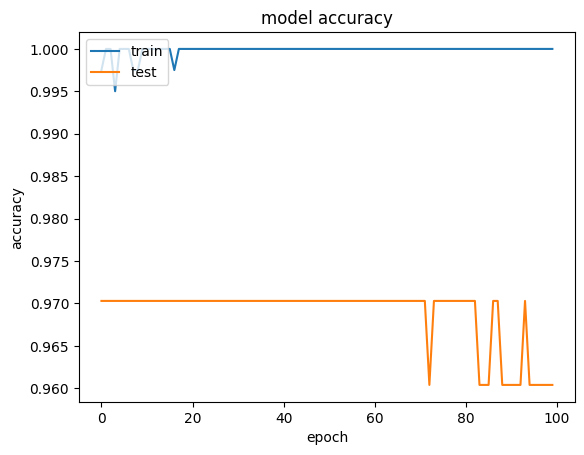

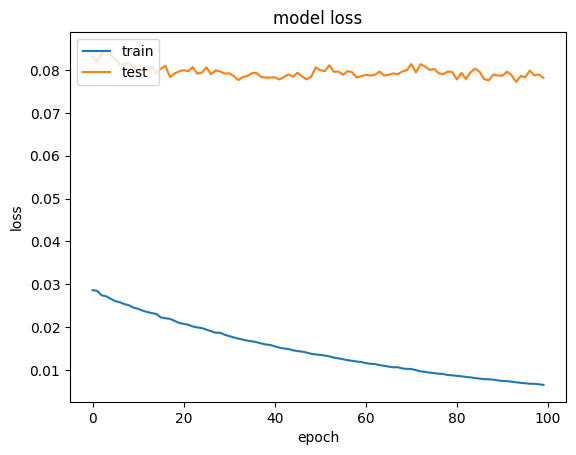

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=32, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred_classes)

0.9702970297029703

In [ ]:
# prompt: export the ann model

# Save the model
model.save('ann_model.h5')
